# Classifying Heart Disease

We have learned a lot about logistic regression and classification in the past four lessons, and it's about time that we use this knowledge on a real-world dataset.

we'll be looking at a real-life dataset: the Heart Disease Data Set from the UCI Machine Learning Repository. This dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of **heart disease** in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.

We'll practice going through the machine learning pipeline, starting from examining the dataset itself to creating a polished classification model. Classification problems are much more common than regression problems, so it'll be good to get some practice.

Let's get started!

In [1045]:
import pandas as pd

heart = pd.read_csv("heart_disease.csv")

## Exploring the Dataset

In [1046]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [1047]:
heart.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
present       0
dtype: int64

No null values. Dataset is clean :)

In [1048]:
print("Number of positive diagnosed is : ",sum(heart["present"]==1))

print("Number of negavtive  diagnosed is : ",sum(heart["present"]==0))

Number of positive diagnosed is :  139
Number of negavtive  diagnosed is :  164


In [1049]:
heart.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca             object
thal           object
present         int64
dtype: object

We have 3 categorical columns (ca & thal). All the others are numericals

In [1050]:
print("ca possible values: ",heart["ca"].unique())
print("thal possible values: ",heart["thal"].unique())
print("present possible values: ",heart["present"].unique())

ca possible values:  ['0.0' '3.0' '2.0' '1.0' '?']
thal possible values:  ['6.0' '3.0' '7.0' '?']
present possible values:  [0 1]


present is our **outcome** <br>
- 0 -> not diagnosed with heart disease  <br>
- 1 -> diagnosed

In [1051]:
heart.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Alright, we can see an important threshold between max and min from age, cp, trestbps, chol, thalach. <br>
Let's see if we could notice an important variation of their means regarding the present value

In [1052]:

summary=heart.groupby("present").agg(
    {
    	"age": "mean",
      	"chol": "mean",
        "fbs": "mean",
        "thalach": "mean",
        "trestbps" : "mean"
    }
)
print(summary)

               age        chol       fbs     thalach    trestbps
present                                                         
0        52.585366  242.640244  0.140244  158.378049  129.250000
1        56.625899  251.474820  0.158273  139.258993  134.568345


Hummmm ! Despite the fact that age, chol, fbs & trestbps are higher for positive diagnosed than negative, and that thalach is higher for present = 0, the variations are still slight. We cant conclude anything.<br><br>
Let's use plots

### Age vs Predicted

<AxesSubplot:xlabel='present', ylabel='age'>

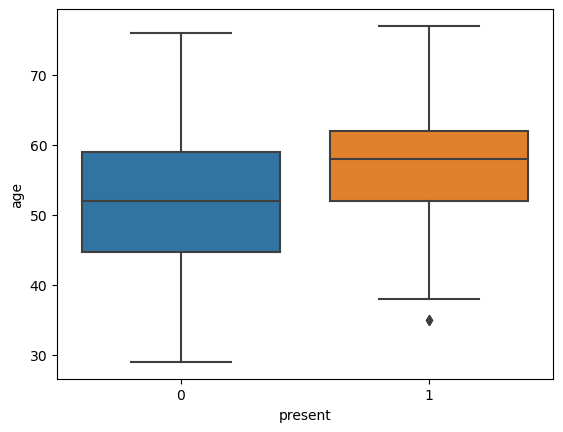

In [1053]:
import seaborn as sns
sns.boxplot(data=heart,x='present',y='age')

### Age vs present

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Positive Heart Diseased Patients\n')

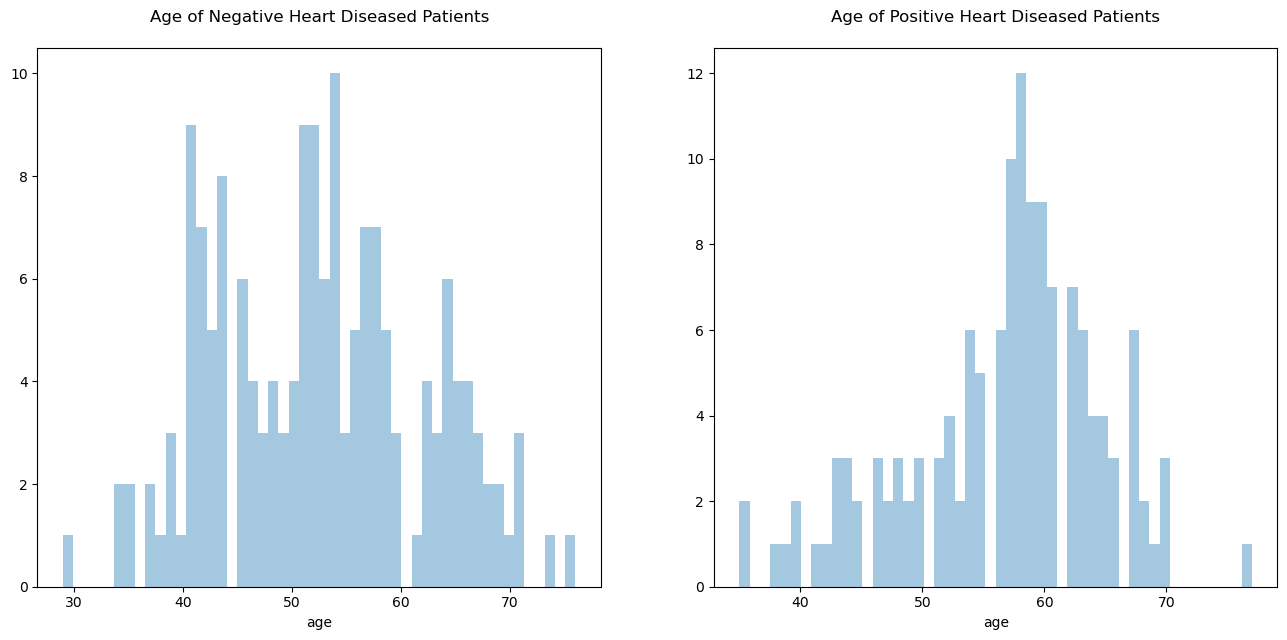

In [1054]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(16, 7))
sns.distplot(heart[heart['present']==0]['age'],kde=False,bins=50, ax=axs[0])
sns.distplot(heart[heart['present']==1]['age'],kde=False,bins=50, ax=axs[1])
axs[0].set_title('Age of Negative Heart Diseased Patients\n')
axs[1].set_title('Age of Positive Heart Diseased Patients\n')


It's not obvious, but for positive patients, we can see that the age is slightly shifted to the right. It means that positive patients are older than negative one. **The age is a parameter to take into account** 

### Gender vs Present

Text(0.5, 1.0, 'Gender v/s present\n')

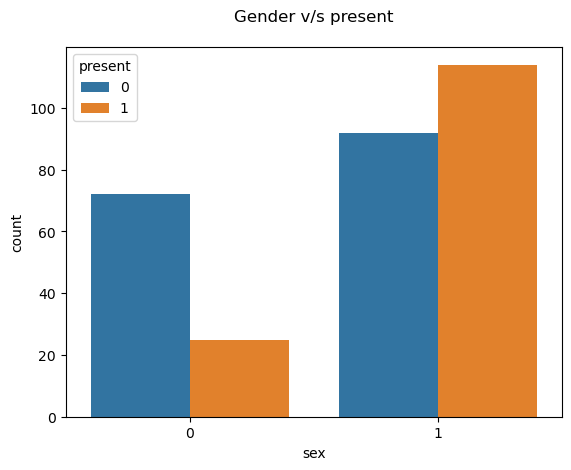

In [1055]:
sns.countplot(data= heart, x='sex',hue='present')
plt.title('Gender v/s present\n')

On axis, 0 = woman, 1 = man
OK... if you're a man, you have higher probabolity of getting heart disease. Actually in our dataset, if we only focus on men, we have more men with heart disease than ones not having any of it..


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Chol of Positive Heart Diseased Patients\n')

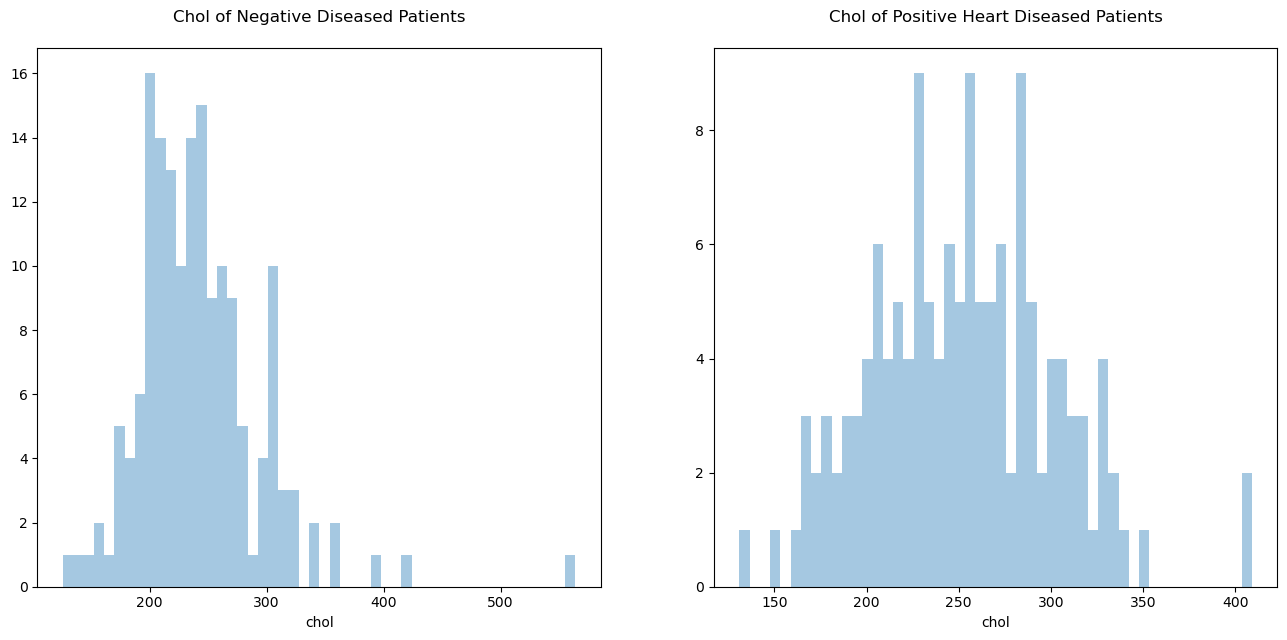

In [1056]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 7))
sns.distplot(heart[heart['present']==0]['chol'],kde=False,bins=50, ax=axs[0])
sns.distplot(heart[heart['present']==1]['chol'],kde=False,bins=50, ax=axs[1])
axs[0].set_title('Chol of Negative Diseased Patients\n')
axs[1].set_title('Chol of Positive Heart Diseased Patients\n')


The more cholesterol you have, the better chance you have of getting heart disease <br>
It's obvious !

Text(0.5, 1.0, 'Exang v/s present\n')

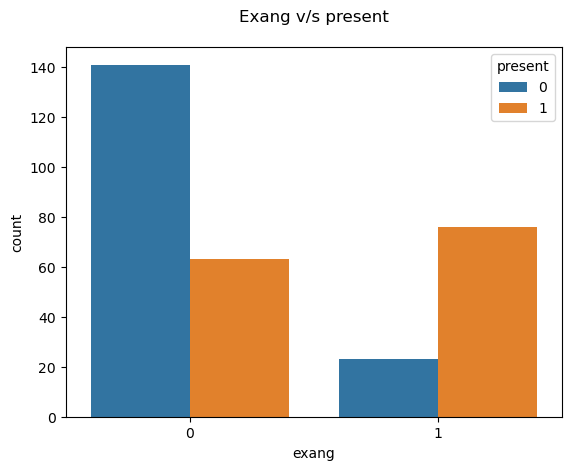

In [1057]:
sns.countplot(data= heart, x='exang',hue='present')
plt.title('Exang v/s present\n')

Holy shit ! Exang == 1 seem to affect positively your chances of gettting heart disease

### exang vs Tahalassemia

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

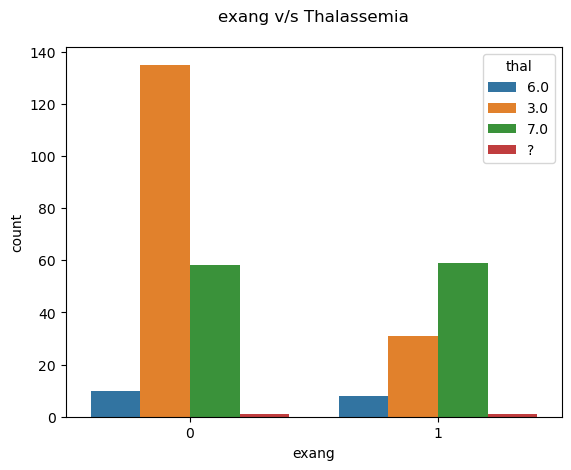

In [1058]:
sns.countplot(data= heart, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

### Age vs trestbps

Age vs trestbps(Heart Diseased Patinets)


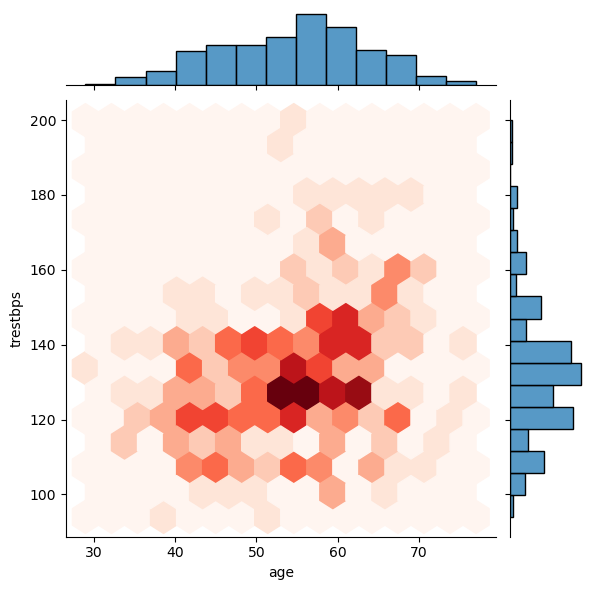

In [1059]:
pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=heart,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )


### Age vs Chol

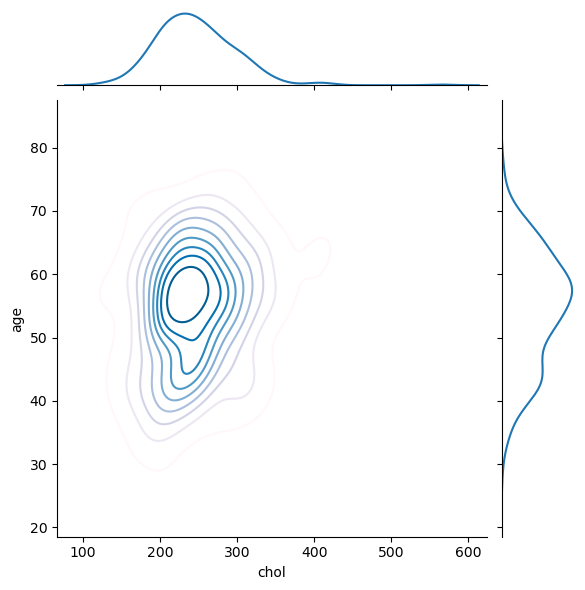

In [1060]:
sns.jointplot(data=heart,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

### Chol vs Trestbps

<AxesSubplot:>

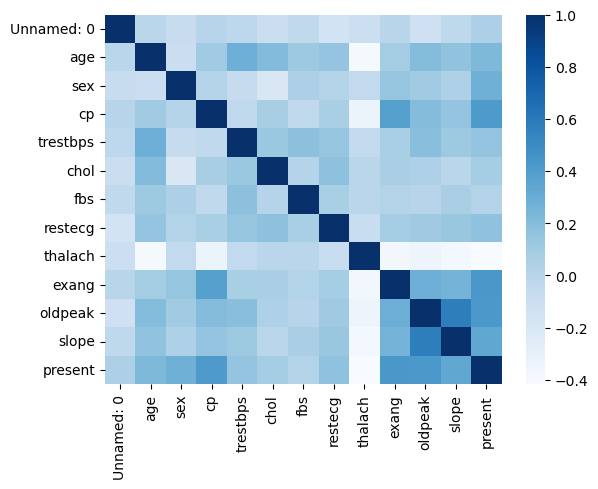

In [1061]:
correlations = heart.corr()
sns.heatmap(correlations, cmap="Blues")

In [1062]:
predictors = ["sex", "cp", "exang", "oldpeak", "slope"]

## Dividing the Data

In [1063]:
from sklearn.model_selection import train_test_split

X = heart[predictors]
y = heart["present"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 734)

print("# Positive Heart disease patients in y_train: ", sum(y_train==1))
print("# Negative Heart disease patients in y_train: ", sum(y_train==0))
print("# Positive Heart disease patients in y_test: ", sum(y_test==1))
print("# Negative Heart disease patients in y_test: ", sum(y_test==0))


# Positive Heart disease patients in y_train:  110
# Negative Heart disease patients in y_train:  132
# Positive Heart disease patients in y_test:  29
# Negative Heart disease patients in y_test:  32


Ok, the split have been done correctly

## Building the Model

In [1064]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_train, y_train)

### Accuracy using only the training set

In [1065]:
print("The accuracy on the training set is: ", accuracy)

The accuracy on the training set is:  0.8016528925619835


### Sensitivity using only the training set

In [1066]:
predictions = model.predict(X_train)

tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sensivity = tp / (tp + fn)

print("The sensitivity on the training set is: ", sensitivity)

The sensitivity on the training set is:  0.42857142857142855


### Specificity using only the training set

In [1067]:
specificity = tn / (tn + fp)

print("The specificity on the training set is: ", specificity)

The specificity on the training set is:  0.8257575757575758


Good results on accuracy, sensitivity. Not perfect but they are all around 80%
Specificity is not good at all. It means that our model has troubles to correctly predict negative values par rapport au nbre total d'échantillons négatifs

## Interpreting the Model Coefficients

In [1068]:
import numpy as np
intercept = model.intercept_
print("Intercept of the model is: ", intercept)
odds_intercept = np.exp(intercept)
print("Odds of intercept is: ",odds_intercept)
print(" ")
coeffs = model.coef_.ravel()
print(coeffs)

for i, coeff in enumerate(coeffs):
    odds_ratio = np.exp(coeff)
    print("log_odds of ",predictors[i]," is: ",coeff)

print(" ")
print(" ")

for i, coeff in enumerate(coeffs):
    odds_ratio = np.exp(coeff)
    print("odds_ratio of ",predictors[i]," is: ",odds_ratio)
    

Intercept of the model is:  [-6.06480829]
Odds of intercept is:  [0.0023232]
 
[1.19759166 0.98563808 1.05031356 0.69423329 0.53870164]
log_odds of  sex  is:  1.1975916604386463
log_odds of  cp  is:  0.985638082130288
log_odds of  exang  is:  1.0503135624513795
log_odds of  oldpeak  is:  0.6942332905779534
log_odds of  slope  is:  0.538701642859733
 
 
odds_ratio of  sex  is:  3.3121305745824405
odds_ratio of  cp  is:  2.679521093582691
odds_ratio of  exang  is:  2.8585473106517605
odds_ratio of  oldpeak  is:  2.0021734000981746
odds_ratio of  slope  is:  1.7137803181600395


Odds if intercept is closed to 0. It suggest that a patient is not likely to be positive or negative when all predictors are 0

All the parameters are > 1, so it means that when we increse their values, patients are more likely to get heart disease. Nevertheless, what surprises me is that the age is not so important. It could be explained by the fact that the mean of age is 54 y.o. The coeff would have been higher is the mean waw around 35 y.o

## Final Model Evaluation

### Accuracy

In [1069]:
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred)

test_accuracy = model.score(X_test, y_test.values.reshape(-1, 1))
print(test_accuracy)


0.7704918032786885


### Sensitivity

In [1070]:
tp = sum((y_pred == 1) & (y_test == 1))
fp = sum((y_pred == 1) & (y_test == 0))
tn = sum((y_pred == 0) & (y_test == 0))
fn = sum((y_pred == 0) & (y_test == 1))
sensitivity = tp / (tp + fn)


print("The sensitivity on the testing set is: ", sensitivity)

The sensitivity on the testing set is:  0.3333333333333333


### Specificity

In [1071]:
specificity = tn / (tn + fp)

print("The specificity on the testing set is: ", specificity)

The specificity on the testing set is:  0.5


## Drawing Conclusions

The model's accuracy is approximately the same for the testing and training set. So the model is not overtitting. <br>
The model seems to predict the non-cases better than the cases. It could be explained by the fact that in our dataset we have more patients with non-cases than the opposite.

The accuracy is 77%. It's OK for non critical use cases. Nevertheless, we could umprove it by adding more observations in our model. 35X is not enough ! 